<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

C:\Users\Olga\AppData\Local\Temp\ipykernel_11704\686016230.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [13]:
#ваш код здесь
data = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep = ';')
print(data)

                                       Пол, возраст           ЗП  \
0        Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1         Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2      Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3          Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4         Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   
...                                             ...          ...   
44739    Мужчина ,  30 лет , родился 17 января 1989   50000 руб.   
44740      Мужчина ,  27 лет , родился 5 марта 1992   39000 руб.   
44741  Женщина ,  48 лет , родилась 26 декабря 1970   40000 руб.   
44742   Мужчина ,  24 года , родился 6 октября 1994   20000 руб.   
44743    Мужчина ,  38 лет , родился 25 апреля 1980  120000 руб.   

                               Ищет работу на должность:  \
0                                Системный администратор   
1                                   Технический писатель   
2  

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [4]:
#ваш код здесь
print(data.head())

                                   Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...  

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [5]:
#ваш код здесь
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [6]:

print(data.describe())


                                         Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
cou

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [14]:
#ваш код здесь
def stage(text):
    text = str(text)# Разделяем строку по пробелам и берем первое слово
    # Определяем категорию образования
    if 'Высшее' in text:
        return 'высшее'
    elif 'Неоконченное высшее' in text:
        return 'неоконченное высшее'
    elif 'Среднее' in text:
        if 'специальное' in text:
            return 'среднее специальное'
        else:
            return 'среднее'
    else:
        return 'другое'
# Применяем ранее написанную функцию к столбцу нашего датафрейм и получаем новый столбец
data['Образование']=data['Образование и ВУЗ'].apply(stage)
# Удаляем старый столбец
data.drop(columns=['Образование и ВУЗ'], inplace=True)
print((data['Образование']=='среднее').sum())

555


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [15]:
# Напишем функцию для определения пола изыскателей
def gender(text):
   # Переводим текст в формат строки
    text= str(text)
    # Делаем перебор и сохраняем значения
    if 'Мужчина' in text:
        return "М"
    else:
        return "Ж"
# Напишем функцию для получения возраста клиента
def age(text):
    tx=text.split()[2]
    return int(tx)
# Получаем новые признаки применив функцию
data['Пол']=data['Пол, возраст'].apply(gender)
data['Возраст']=data['Пол, возраст'].apply(age)
# Удаляем старый признак
data.drop(columns = ['Пол, возраст'], inplace=True)
#print(data['Пол'].value_counts())
#print(data['Пол'].value_counts('Ж'))
print(data['Возраст'].mean())

32.19674146254246


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [16]:
# Напишем функцию для определения количества месяцев опыта работы
def get_experience(arg):
    if arg is np.nan or arg == 'Не указано':
        return None
    # Варианты упоминания времени в тексте
    year_words=['год', 'года', 'лет']
    month_words=['месяц', 'месяца', 'месяцев']
    arg_splitted = arg.split(' ')[:7]
    # Счетчик лет и месяцев
    years = 0
    months = 0
    for index, item in enumerate (arg_splitted):
        if item in year_words:
            years = int(arg_splitted[index-1])
        if item in month_words:
            months = int(arg_splitted[index-1])
    return int(years*12 + months)
data['Опыт работы (месяц)'] = data['Опыт работы'].apply(get_experience)
data = data.drop('Опыт работы', axis=1)
print(data['Опыт работы (месяц)'])


0        202.0
1        233.0
2        123.0
3        225.0
4         67.0
         ...  
44739     91.0
44740     84.0
44741    257.0
44742     46.0
44743    190.0
Name: Опыт работы (месяц), Length: 44744, dtype: float64


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [17]:
## Функция для получения города изыскателей  
def get_city(arg):
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород',
                      'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 
                      'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград'
                     ]
    city = arg.split(' , ')[0]
    if (city == 'Москва') or (city == 'Санкт-Петербург'):
        return city
    elif city in million_cities:
        return 'город миллионник'
    else:
        return 'другие'
 #   # Функция для получения признака готовность к переезду  
def get_ready_to_move(arg):
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    elif 'хочу' in arg:
        return True
    else:
        return True
# Функция для получения признака готовность к командировкам  
def get_ready_for_bisiness_trips(arg):
    if ('командировка' in arg):
        if ('не готов к командировкам' in arg) or('не готова к командировкам' in arg):
            return False
        else: 
            
            return True
    else:
        return False
    
data['Город'] = data['Город, переезд, командировки'].apply(get_city)
data['Готовность к переезду'] = data['Город, переезд, командировки'].apply(get_ready_to_move)
data['Готовность к командировкам'] = data['Город, переезд, командировки'].apply(get_ready_for_bisiness_trips)
data = data.drop('Город, переезд, командировки', axis=1)
print(round(data['Город'].value_counts(normalize=True)['Санкт-Петербург'] * 100)) 
print(round(data[
    data['Готовность к переезду'] & data['Готовность к командировкам']
].shape[0] / data.shape[0] *100))

11
32


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [19]:
# Применение One Hot Encoding для признака "Занятость"
# Все значения занятости соискателей
employments = ['полная занятость', 'частичная занятость',
              'проектная работа', 'волонтерство', 'стажировка']
# Все значения говорящие о графике соискателей
charts = ['полный день', 'сменный график', 
         'гибкий график', 'удаленная работа',
           'вахтовый метод']
for employment, chart in zip(employments, charts):
    data[employment] = data['Занятость'].apply(lambda x: employment in x)
    data[chart] = data['График'].apply(lambda x: chart in x)
data = data.drop('Занятость', axis=1)
data = data.drop('График', axis=1)
print(data[data['проектная работа'] & data['волонтерство']].shape[0])
print(data[data['вахтовый метод'] & data['гибкий график']].shape[0])

436
2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [20]:
# Инициализируем дата фрейм с номиналом валют 
rates = pd.read_csv('ExchangeRates.csv')
# Переводим столб дэйт в формат дататайм и берем только дату 
rates['date'] = pd.to_datetime(rates['date'])
rates['date'] = rates['date'].dt.date
# То же самое делаем с исходным файлом
data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме'])
data['Обновление резюме'] = data['Обновление резюме'].dt.date
#Удаляем дубликаты из rates
#rates['date'].drop_duplicates()

# Пишем функцию для определения числогого значения зп
def nominal (val):
        val =val.split()[0]
        return val
# И для определения валюты
def curr (val):
        # В ходе наблюдения было установлено что в наших данных 2 валюты написаны не в формате iso, исправим это
        if val.split()[1]== 'бел.руб.':
            return  'BYN'           
        elif val.split()[1] =='грн.':
            return 'UAH'
        # В остальных случаях возвращаем валюту
        else:
            return val.split()[1]
# Применяем наши функции к столбцу зп и получаем новый столб Заработная плата(уе), а так же Наименование валюты
data['Заработная плата(уе)'] = data['ЗП'].apply(nominal)
data['Наименование валюты'] = data['ЗП'].apply(curr)
# Объединяем таблицы по дате и валюте
data = pd.merge(data, rates, left_on=['Обновление резюме', 'Наименование валюты'],right_on=['date', 'currency'], how='left')
# Преобразуем типы
data['Заработная плата(уе)']=data['Заработная плата(уе)'].astype(float)
# Создаем новый столбец, применяя лямбда функцию, которая преобразует числовое значение в соответствии его валюте
data['ЗП(руб)']=data.apply(lambda x:(x['Заработная плата(уе)'] * x['close'])/x['proportion'] if x['Наименование валюты'] == x['currency'] else x['Заработная плата(уе)'], axis=1 )
#data.drop('Заработная плата(уе)',inplace=True)
#data.drop('Наименование валюты', inplace=True)
print(data['ЗП(руб)'])

C:\Users\Olga\AppData\Local\Temp\ipykernel_11704\756431657.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  rates['date'] = pd.to_datetime(rates['date'])


C:\Users\Olga\AppData\Local\Temp\ipykernel_11704\756431657.py:7: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме'])


0         29000.0
1         40000.0
2         20000.0
3        100000.0
4        140000.0
           ...   
44739     50000.0
44740     39000.0
44741     40000.0
44742     20000.0
44743    120000.0
Name: ЗП(руб), Length: 44744, dtype: float64


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [ ]:
# ваш код здесь
plt.figure(figsize=(12, 6))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(data= data, x='Возраст', kde=True, bins=[i for i in range(data['Возраст'].min(), data['Возраст'].max() + 1)], color='skyblue')
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')

# Коробчатая диаграмма
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Возраст', color='lightgreen')
plt.title('Распределение возраста')
plt.xlabel('Возраст')

plt.tight_layout()
plt.show()

Глядя на  коробчатую диаграмму видно, что большинство соискателей - люди в возрасте от 30 до 37 лет.
А гистограмма показывает нам что соискатели чей возраст от 18 до 20 и больше 50 почти не оставляют заявки на нашем сайте, а ведь как раз в 18 лет все и стараются найти работу, надо показать им что это можно делать у нас!

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

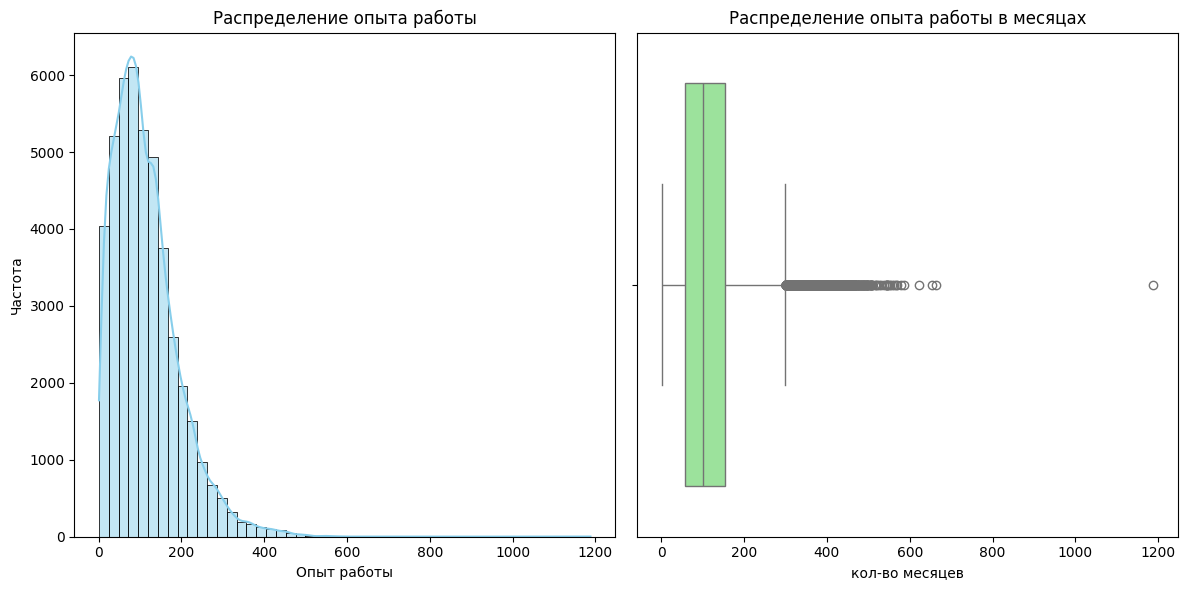

1188.0


In [21]:
# ваш код здесь
plt.figure(figsize=(12, 6))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(data= data, x='Опыт работы (месяц)', kde=True, bins=50, color='skyblue')
plt.title('Распределение опыта работы')
plt.xlabel('Опыт работы')
plt.ylabel('Частота')

# Коробчатая диаграмма
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Опыт работы (месяц)', color='lightgreen')
plt.title('Распределение опыта работы в месяцах')
plt.xlabel('кол-во месяцев')

plt.tight_layout()
plt.show()
print(data['Опыт работы (месяц)'].max())

ваши выводы здесь

Исходя из полученных графиков можно наблюдать, что большая часть соискателей имеет опыт работы до 200 часов, чем больше опыт работы после 200 часов тем меньше соискателей

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [ ]:
fig = px.histogram(
    data_frame=data,
    x='ЗП(руб)',
    title='Распределение желаемой з/п соискателей',
    histnorm='percent',
    width=500,
    marginal='box'
)
fig.show()



ваши выводы здесь

Большая часть соискателей ищет работу с  с зп около 67 тысяч. А так же есть 5 человек, которые хотят зп больше миллиона

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

C:\Users\Olga\AppData\Local\Temp\ipykernel_11704\1474911408.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=education_salary_median, x='Образование', y='ЗП(руб)', palette='viridis')


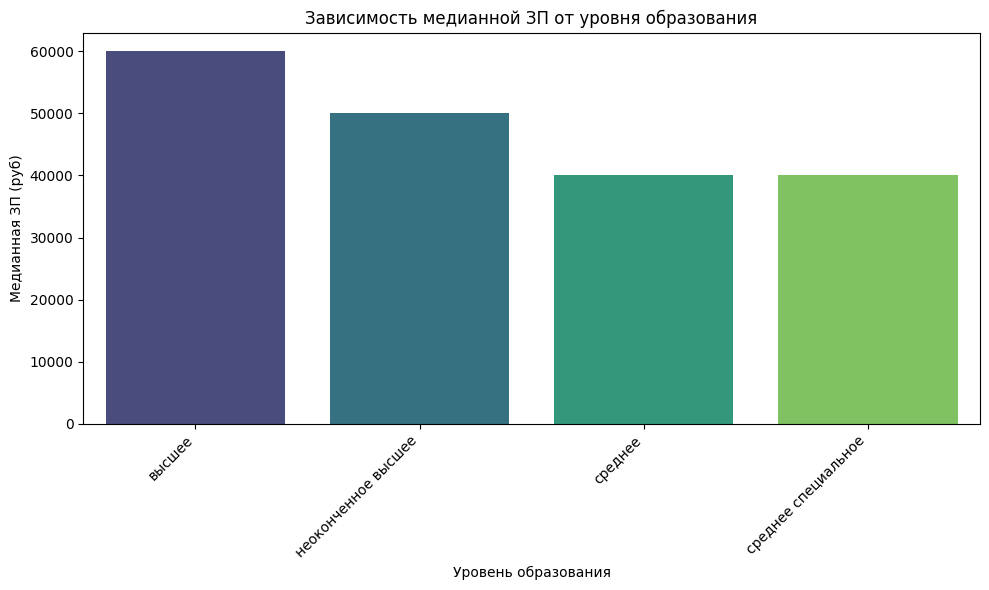

In [22]:
filtered_data = data[data['ЗП(руб)'] < 1000000]

# Группировка данных по уровню образования и вычисление медианы для каждой группы
education_salary_median = filtered_data.groupby('Образование')['ЗП(руб)'].median().reset_index()

# Построение диаграммы
plt.figure(figsize=(10, 6))
sns.barplot(data=education_salary_median, x='Образование', y='ЗП(руб)', palette='viridis')
plt.title('Зависимость медианной ЗП от уровня образования')
plt.xlabel('Уровень образования')
plt.ylabel('Медианная ЗП (руб)')
plt.xticks(rotation=45, ha='right')  # Поворот меток оси x для лучшей читаемости
plt.tight_layout()
plt.show()

ваши выводы здесь

Чем выше уровень образования тем выше медианная заработная плата. На уровне среднего-среднеспециального образования различия почти нет

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [23]:
box_data = data[data['ЗП(руб)']<1e6]
fig = px.box(
    data_frame=box_data,
    x='Город',
    y='ЗП(руб)',
    color='Город',
    title='Распределение з/п по городам'
)
fig.show()

Исходя из диаграммы делаем вывод: люди из Москвы просят почти в 2 раза больше денег, так как стоимость жизни в москве на порядок выше чем в большинстве городов

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [ ]:
bar_data = data.groupby(
    ['Готовность к командировкам', 'Готовность к переезду'],
    as_index=False
)['ЗП(руб)'].median()
fig = px.bar(
    data_frame=bar_data,
    y='Готовность к переезду',
    x='ЗП(руб)',
    barmode="group",
    color='Готовность к командировкам',
    orientation='h',
    title='Медианная з/п по готовности к командировкам/переезду'
)
fig.show()

Разумеется человек предлагающий больше возможностей требует больше денег

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

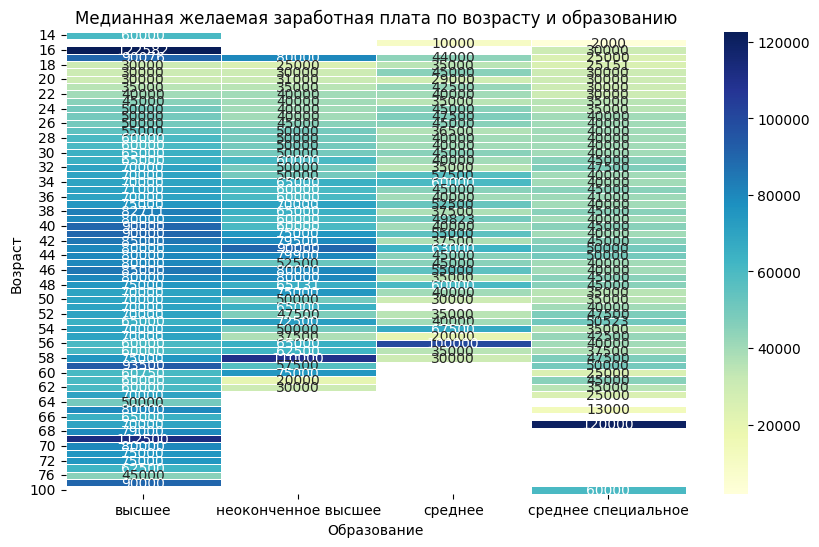

In [24]:
# ваш код здесь
pivot_table = data.pivot_table(index='Возраст', columns='Образование', values = 'ЗП(руб)', aggfunc='median')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".0f", linewidths=.5)
plt.title('Медианная желаемая заработная плата по возрасту и образованию')
plt.xlabel('Образование')
plt.ylabel('Возраст')
plt.show()

ваши выводы здесь

Мы можем наблюдать очень много интересных признаков, перечислю пару: у 18 летних людей разница в медианной желаемой зп в зависимости от уровня образования  скачет больше большинства возрастов,так же можно заметить что 16 летние с высшим зарабатывает больше всех остальных(по медиане) так же видно аномально высокую зп у людей 66 лет со средним специальным

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

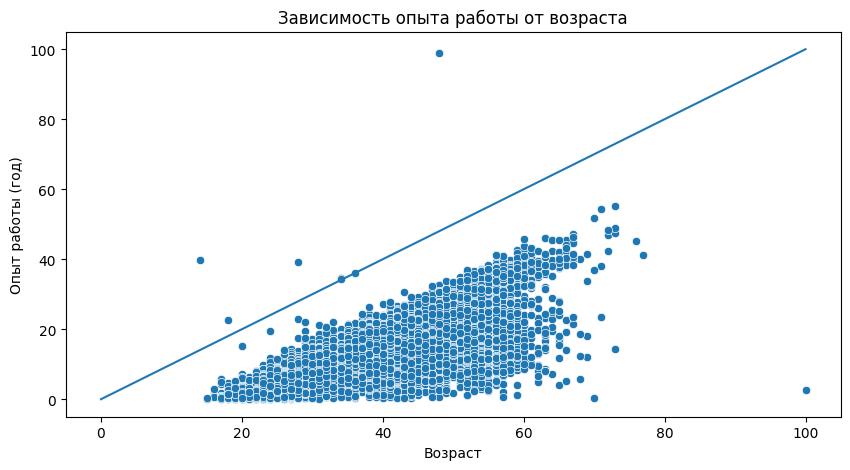

In [25]:
# ваш код здесь
# Построим диаграмму рассеяния
fig = plt.figure(figsize=(10, 5))
scatter_data = data.copy()
scatter_data['Опыт работы (год)'] = scatter_data['Опыт работы (месяц)']/12
sns.lineplot(x=[0, 100], y=[0, 100])
ax = sns.scatterplot(
    data=scatter_data, 
    x='Возраст',
    y='Опыт работы (год)',
)
ax.set_title('Зависимость опыта работы от возраста');

Видно очевидную тенденцию - чем выше возраст тем больше опыт работы

ваши выводы здесь

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [ ]:
# ваш код здесь
ready_for_business_trip = data[data['Готовность к командировкам']]
not_ready_for_business_trip = data[~data['Готовность к командировкам']]

# Разделим данные на две категории: готовность и неготовность к переезду
ready_for_relocation = data[data['Готовность к переезду']]
not_ready_for_relocation = data[~data['Готовность к переезду']]

# Построим график
plt.figure(figsize=(10, 6))

# Готовность к командировкам
plt.scatter(ready_for_business_trip['Возраст'], [1]*len(ready_for_business_trip), color='blue', label='Готов к командировкам')
plt.scatter(not_ready_for_business_trip['Возраст'], [0]*len(not_ready_for_business_trip), color='red', label='Не готов к командировкам')

# Готовность к переезду
plt.scatter(ready_for_relocation['Возраст'], [-1]*len(ready_for_relocation), color='green', label='Готов к переезду')
plt.scatter(not_ready_for_relocation['Возраст'], [-2]*len(not_ready_for_relocation), color='orange', label='Не готов к переезду')

# Настройка графика
plt.yticks([-2, -1, 0, 1], ['Не готов к переезду', 'Готов к переезду', 'Не готов к командировкам', 'Готов к командировкам'])
plt.xlabel('Возраст')
plt.title('Зависимость готовности к командировкам и переезду от возраста')
plt.legend()
plt.grid(True)
plt.show()

Можем увидеть что готовность к переезду или командировкам не зависит от возраста соискателей

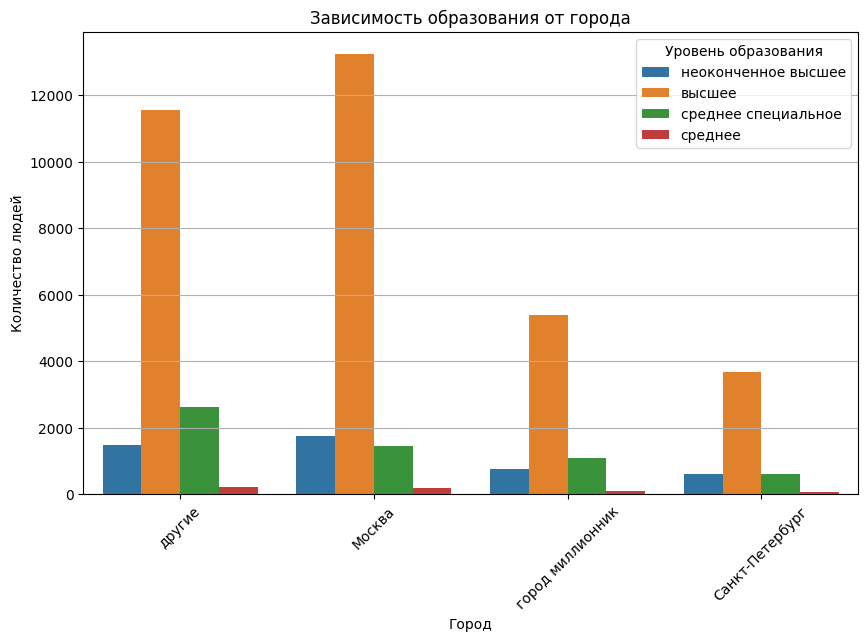

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Город', hue='Образование')

# Настройка графика
plt.title('Зависимость образования от города')
plt.xlabel('Город')
plt.ylabel('Количество людей')
plt.xticks(rotation=45)
plt.legend(title='Уровень образования')
plt.grid(axis='y')

plt.show()

На этом гграфике видно что уровень образования почти не зависит от города проживания соискателя,а так же наглядно заметно преобладание высшего образования

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [ ]:
# ваш код здесь
data=data.drop_duplicates()

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [ ]:
data.info()# ваш код здесь

<class 'pandas.core.frame.DataFrame'>
Index: 44586 entries, 0 to 44743
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ЗП                               44586 non-null  object 
 1   Ищет работу на должность:        44586 non-null  object 
 2   Последнее/нынешнее место работы  44585 non-null  object 
 3   Последняя/нынешняя должность     44584 non-null  object 
 4   Обновление резюме                44586 non-null  object 
 5   Авто                             44586 non-null  object 
 6   Образование                      44586 non-null  object 
 7   Опыт работы (месяц)              44418 non-null  float64
 8   Опыт работы (год)                44418 non-null  float64
 9   Пол                              44586 non-null  object 
 10  Возраст                          44586 non-null  int64  
 11  Город                            44586 non-null  object 
 12  Готовность к переезду  

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [ ]:
# ваш код здесь
data= data.dropna(subset=["Последнее/нынешнее место работы", "Последняя/нынешняя должность"])
median_value = data['Опыт работы (месяц)'].median()

# Заменить пропуски медианой
data['Опыт работы (месяц)'].fillna(median_value, inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 44742 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Пол, возраст                     44742 non-null  object 
 1   ЗП                               44742 non-null  object 
 2   Ищет работу на должность:        44742 non-null  object 
 3   Город, переезд, командировки     44742 non-null  object 
 4   Занятость                        44742 non-null  object 
 5   График                           44742 non-null  object 
 6   Последнее/нынешнее место работы  44742 non-null  object 
 7   Последняя/нынешняя должность     44742 non-null  object 
 8   Образование и ВУЗ                44742 non-null  object 
 9   Обновление резюме                44742 non-null  object 
 10  Авто                             44742 non-null  object 
 11  Опыт работы (месяц)              44742 non-null  float64
dtypes: float64(1), object(1

C:\Users\Olga\AppData\Local\Temp\ipykernel_5208\2996751586.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Опыт работы (месяц)'].fillna(median_value, inplace=True)


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [ ]:
# ваш код здесь
data['ЗП(руб)']=data['ЗП(руб)']<=1000000
data= data.dropna(subset=["ЗП(руб)"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44742 entries, 0 to 44741
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Пол, возраст                     44742 non-null  object 
 1   ЗП                               44742 non-null  object 
 2   Ищет работу на должность:        44742 non-null  object 
 3   Город, переезд, командировки     44742 non-null  object 
 4   Занятость                        44742 non-null  object 
 5   График                           44742 non-null  object 
 6   Последнее/нынешнее место работы  44742 non-null  object 
 7   Последняя/нынешняя должность     44742 non-null  object 
 8   Образование и ВУЗ                44742 non-null  object 
 9   Обновление резюме                44742 non-null  object 
 10  Авто                             44742 non-null  object 
 11  Опыт работы (месяц)              44742 non-null  float64
 12  Заработная плата(у

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [ ]:
# ваш код здесь
outliers = data[(data['ЗП (руб)'] > 1e6) | (data['ЗП (руб)'] < 1e3)]
data = data.drop(outliers.index)
print(outliers.shape[0])

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [ ]:
# ваш код здесь
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_age = np.log(data['Возраст'] + 1)
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean()+ 4 *log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean()- 3 *log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Log Age Distribution');

def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
outliers, cleaned_data = outliers_z_score_mod(data, 'Возраст', left=3,  right=4, log_scale=True)
print(outliers.shape[0])

ваш коммментарий здесь